In [10]:
import networkx as nx
import networkit as nk
import pandas as pd
import numpy as np
from scipy import stats
from nilearn import plotting, connectome
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corrmat = np.loadtxt('matrix_gen_testing/power2011_corr.txt')

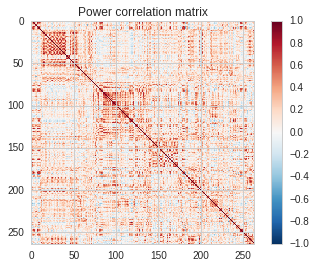

In [11]:
plt.imshow(corrmat, vmin=-1., vmax=1., cmap='RdBu_r', interpolation='nearest')
plt.colorbar()
plt.title('Power correlation matrix')

In [35]:
corrmat.min()

-0.56330405263002248

In [45]:
corrmat_z = np.arctanh(corrmat) # Fischer r-to-z

In [46]:
corrmat_z.min()

-0.63765983130554904

In [47]:
np.fill_diagonal(corrmat_z, 0)

In [48]:
corrmat_z.min()

-0.63765983130554904

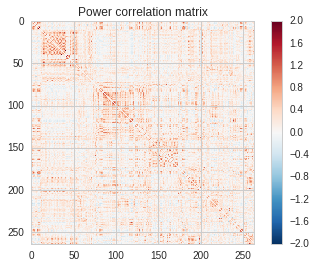

In [40]:
plt.imshow(corrmat_z, vmin=-2, vmax=2., cmap='RdBu_r', interpolation='nearest')
plt.colorbar()
plt.title('Power correlation matrix')

In [49]:
corrmat_z_posonly = corrmat_z.copy()

In [51]:
corrmat_z_posonly[corrmat_z_posonly < 0] = 0

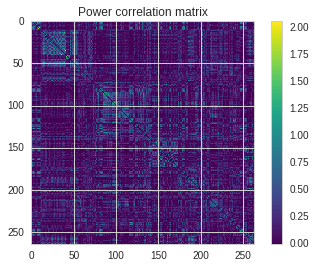

In [55]:
plt.imshow(corrmat_z_posonly, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Power correlation matrix')

In [70]:
G = nx.from_numpy_matrix(corrmat_z_posonly)

In [73]:
G[1][2]

{'weight': 0.4576526667776999}

In [74]:
N = nk.nxadapter.nx2nk(G, weightAttr='weight')

In [82]:
communities = nk.community.detectCommunities(N, algo=nk.community.PLM(N, True))

PLM(balanced,refine,pc,turbo) detected communities in 0.002476930618286133 [s]
solution properties:
-------------------  ---------
# communities         4
min community size   31
max community size   90
avg. community size  66
modularity            0.257449
-------------------  ---------


In [ ]:
nk.viztools.

In [83]:
pf = nk.profiling.Profile.create(N, preset='minimal')

In [84]:
pf.show()

Network Structural Profile 
 
	<!--- HELP --->
 Navigating the profile 
 
 the profile includes the following sections by default: 
 
 global properties 
 overview of node centrality and partition distributions 
 detail views of node centrality distributions 
 node centrality correlations 
 detail views of partitions 
 
 click [+] for descriptions of measures 
 click on distribution thumbnail for detail view 
 hover over variable name of statistical figures for explanation 
 click on distribution plot for larger view 
 
 
	<!--- END HELP --->
 
 G#3 
 264 
 26117 
 0.752304 
 False 
 True 
 0 
 N/A 
 N/A 
 1 
 
 
 
 <img src="data:image/svg+xml;utf8,%3Csvg%20height%3D%22180pt%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%20180%22%20width%3D%22288pt%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%3E%20%3Cdefs%3E%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%20%2A%7Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Around%3Bstroke-miterlimit%3A100000%3B%7D%20%3C%2Fstyle%3E%20%3C%2Fdefs%3E%20%3Cg%20id%3D%22figure_1%22%3E%20%3Cg%20id%3D%22patch_1%22%3E%20%3Cpath%20d%3D%22M%200%20180%20L%20288%20180%20L%20288%200%20L%200%200%20z%20%22%20style%3D%22fill%3A%23ffffff%3B%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22axes_1%22%3E%20%3Cg%20id%3D%22patch_2%22%3E%20%3Cpath%20d%3D%22M%2029.05%20135.6%20L%20261.4%20135.6%20L%20261.4%2010.8%20L%2029.05%2010.8%20z%20%22%20style%3D%22fill%3A%23ffffff%3B%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22matplotlib.axis_1%22%3E%20%3Cg%20id%3D%22xtick_1%22%3E%20%3Cg%20id%3D%22line2d_1%22%3E%20%3Cpath%20clip-path%3D%22url%28%23p7aa62b38df%29%22%20d%3D%22M%2054.813872%20135.6%20L%2054.813872%2010.8%20%22%20style%3D%22fill%3Anone%3Bstroke%3A%23d3d3d3%3Bstroke-linecap%3Around%3B%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22line2d_2%22%3E%20%3Cdefs%3E%20%3Cpath%20d%3D%22M%200%200%20L%200%200%20%22%20id%3D%22m3d21e97cf6%22%20style%3D%22stroke%3A%23d3d3d3%3B%22%2F%3E%20%3C%2Fdefs%3E%20%3Cg%3E%20%3Cuse%20style%3D%22fill%3A%23d3d3d3%3Bstroke%3A%23d3d3d3%3B%22%20x%3D%2254.8138718473%22%20xlink%3Ahref%3D%22%23m3d21e97cf6%22%20y%3D%22135.6%22%2F%3E%20%3C%2Fg%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22line2d_3%22%3E%20%3Cg%3E%20%3Cuse%20style%3D%22fill%3A%23d3d3d3%3Bstroke%3A%23d3d3d3%3B%22%20x%3D%2254.8138718473%22%20xlink%3Ahref%3D%22%23m3d21e97cf6%22%20y%3D%2210.8%22%2F%3E%20%3C%2Fg%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22text_1%22%3E%20%3C%21--%20%24%5Cmathdefault%7B100%7D%24%20--%3E%20%3Cdefs%3E%20%3Cpath%20d%3D%22M%2051.703125%2034.421875%20Q%2051.703125%2024.515625%2049.828125%2017.75%20Q%2047.953125%2010.984375%2044.703125%206.8125%20Q%2041.453125%202.640625%2037.0625%200.828125%20Q%2032.671875%20-0.984375%2027.6875%20-0.984375%20Q%2022.65625%20-0.984375%2018.3125%200.828125%20Q%2013.96875%202.640625%2010.765625%206.78125%20Q%207.5625%2010.9375%205.734375%2017.703125%20Q%203.90625%2024.46875%203.90625%2034.421875%20Q%203.90625%2044.828125%205.734375%2051.640625%20Q%207.5625%2058.453125%2010.78125%2062.5%20Q%2014.015625%2066.546875%2018.40625%2068.1875%20Q%2022.796875%2069.828125%2027.984375%2069.828125%20Q%2032.90625%2069.828125%2037.21875%2068.1875%20Q%2041.546875%2066.546875%2044.765625%2062.5%20Q%2048%2058.453125%2049.84375%2051.640625%20Q%2051.703125%2044.828125%2051.703125%2034.421875%20M%2042.78125%2034.421875%20Q%2042.78125%2042.625%2041.796875%2048.0625%20Q%2040.828125%2053.515625%2038.921875%2056.765625%20Q%2037.015625%2060.015625%2034.25%2061.359375%20Q%2031.5%2062.703125%2027.984375%2062.703125%20Q%2024.265625%2062.703125%2021.4375%2061.328125%20Q%2018.609375%2059.96875%2016.671875%2056.71875%20Q%2014.75%2053.46875%2013.765625%2048.015625%20Q%2012.796875%2042.578125%2012.796875%2034.421875%20Q%2012.796875%2026.515625%2013.796875%2021.09375%20Q%2014.796875%2015.671875%2016.71875%2012.375%20Q%2018.65625%209.078125%2021.4375%207.640625%20Q%2024.21875%206.203125%2027.78125%206.203125%20Q%2031.25%206.203125%2034.03125%207.640625%20Q%2036.8125%209.078125%2038.734375%2012.375%2

In [89]:
list(range(10)) + list(range(14,20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19]

In [88]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]